***IMPORTING DEPENDENCIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,confusion_matrix


In [2]:
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#importing the dataset
dataframe=pd.read_csv("/content/air quality data.csv")

***DATA ANALYSIS***

In [4]:
dataframe.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
dataframe.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [6]:
dataframe.shape

(29531, 16)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
#checking whether duplicates present in the dataset or not
dataframe.duplicated().sum()

0

In [9]:
#counting no of values presenr in a dataset
value_count=dataframe.value_counts()

In [10]:
value_count

City           Date        PM2.5  PM10    NO     NO2    NOx    NH3    CO    SO2    O3      Benzene  Toluene  Xylene  AQI    AQI_Bucket  
Amaravati      2017-11-25  81.40  124.50  1.44   20.50  12.08  10.72  0.12  15.24  127.09  0.20     6.50     0.06    184.0  Moderate        1
Hyderabad      2019-06-20  18.96  56.20   1.96   11.05  7.20   10.23  0.32  6.32   27.66   0.31     1.45     0.13    54.0   Satisfactory    1
               2019-07-12  18.41  39.59   3.63   15.07  10.10  13.38  0.42  8.40   16.69   0.26     2.87     0.09    45.0   Good            1
               2019-07-11  16.54  39.46   2.57   12.01  7.99   8.42   0.35  5.19   16.63   0.17     0.79     0.04    40.0   Good            1
               2019-07-10  12.67  31.67   2.39   9.99   6.38   4.88   0.33  4.32   16.24   0.08     0.23     0.01    36.0   Good            1
                                                                                                                                           ..
Delhi          2018-07-25  34.70  80.13   15.59  27.58  28.48  39.46  0.81  9.99   21.39   1.18     26.71    0.56    90.0   Satisfactory    1
               2018-07-24  39.30  94.80   12.18  29.15  26.72  40.08  0.83  10.78  34.46   1.50     24.69    0.45    101.0  Moderate        1
               2018-07-23  32.39  69.73   14.28  28.74  29.43  39.30  0.81  10.43  26.11   1.39     23.10    0.48    80.0   Satisfactory    1
               2018-07-22  25.81  47.63   12.14  27.55  27.12  37.26  0.83  9.85   24.91   1.28     23.18    0.63    87.0   Satisfactory    1
Visakhapatnam  2020-06-30  16.64  49.97   4.05   29.26  18.80  10.03  0.52  9.84   28.30   0.00     0.00     0.00    54.0   Satisfactory    1
Name: count, Length: 6236, dtype: int64

In [11]:
#checking how many missing values are there in dataset
dataframe.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [12]:
#dropping null values based on aqi column
dataframe1= dataframe.dropna(subset=['AQI'],inplace=True)

In [13]:
dataframe.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [14]:
dataframe.shape

(24850, 16)

In [15]:
#statistical values
dataframe.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [16]:
null_values_percentage = (dataframe.isnull().sum()/dataframe.isnull().count()*100).sort_values(ascending=False)


In [17]:
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


Data analysis

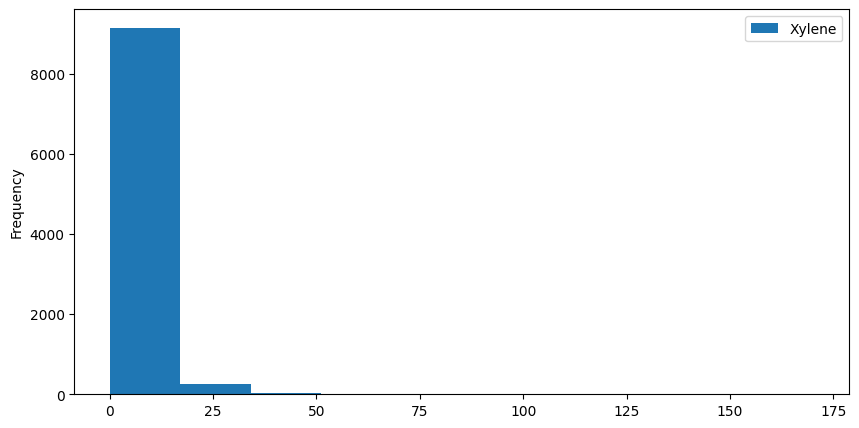

In [18]:
dataframe['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

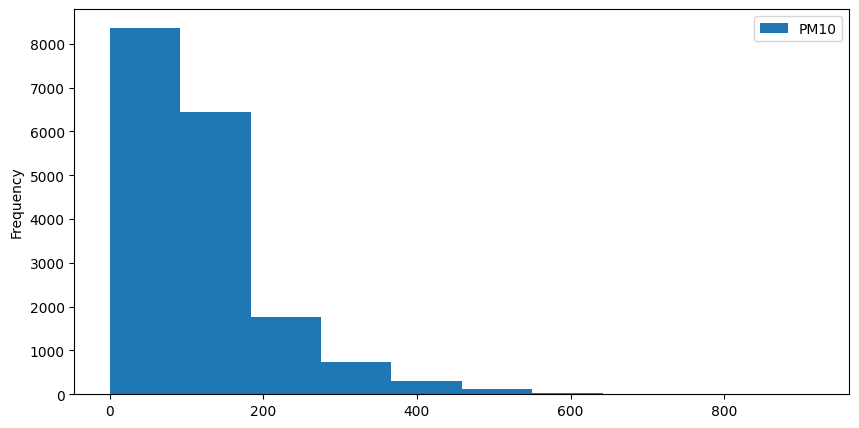

In [19]:
dataframe['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

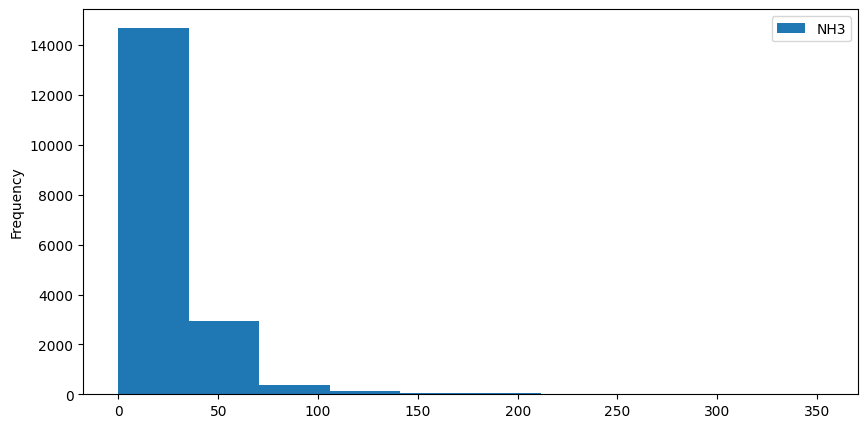

In [20]:
dataframe['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

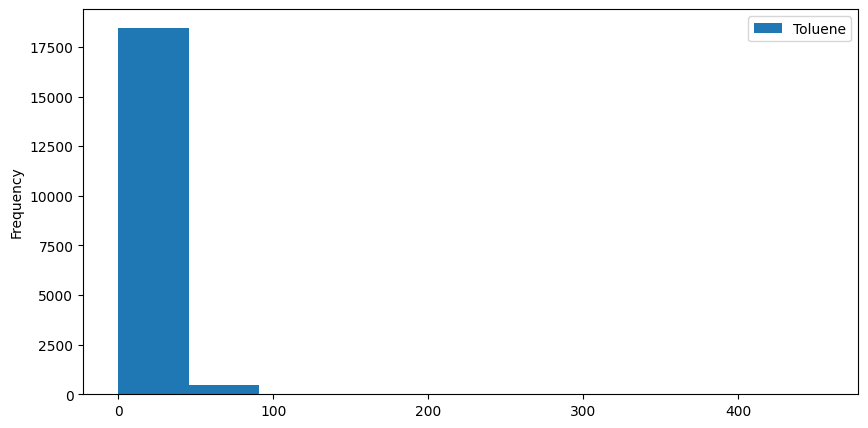

In [21]:
dataframe['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

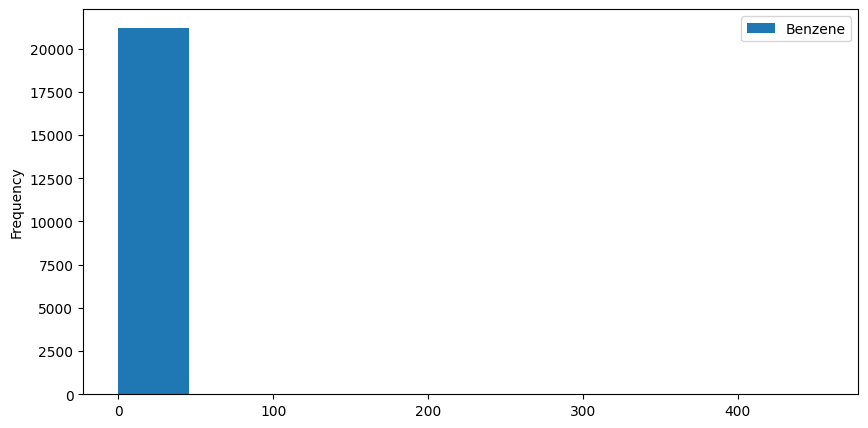

In [22]:
dataframe['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

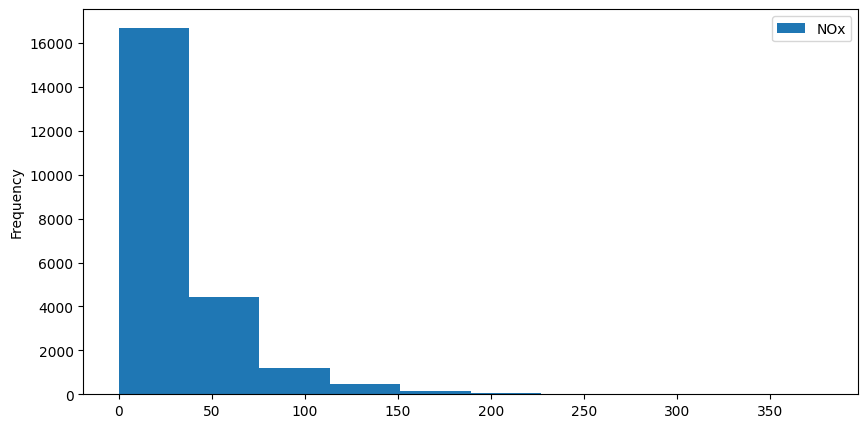

In [23]:
dataframe['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

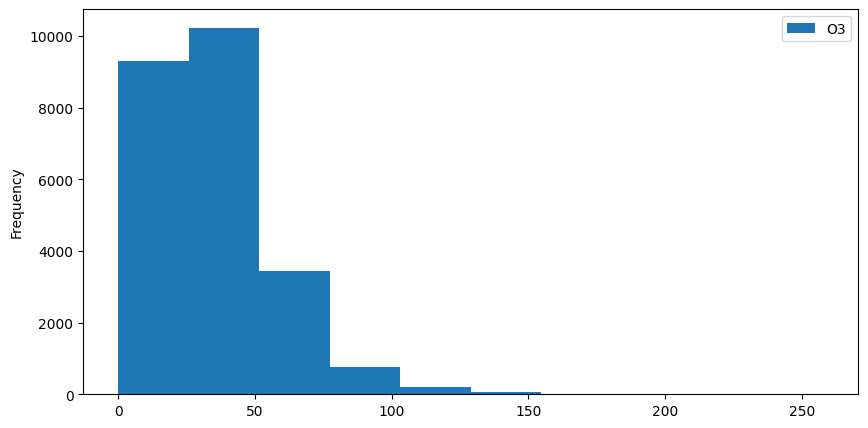

In [24]:
dataframe['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

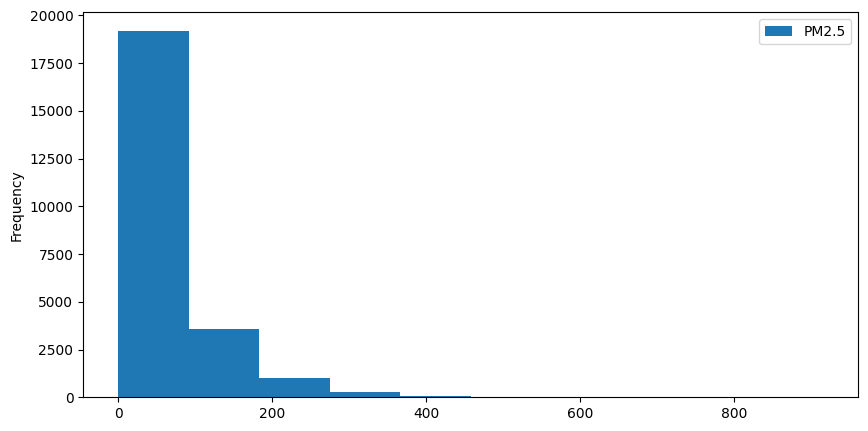

In [25]:
dataframe['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

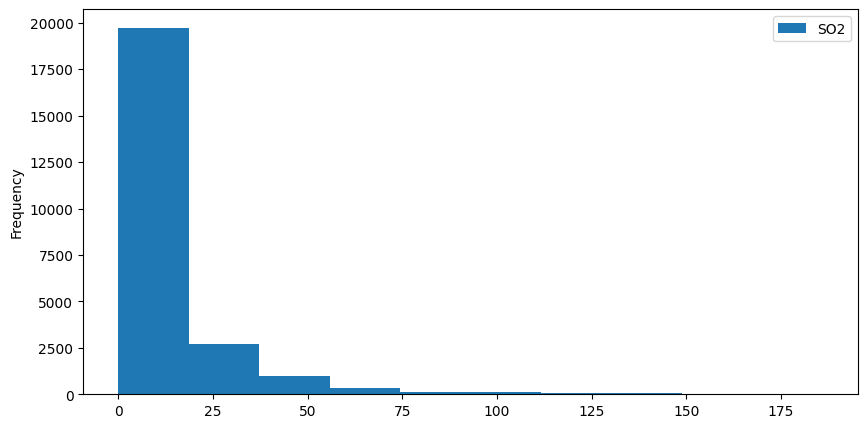

In [26]:
dataframe['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

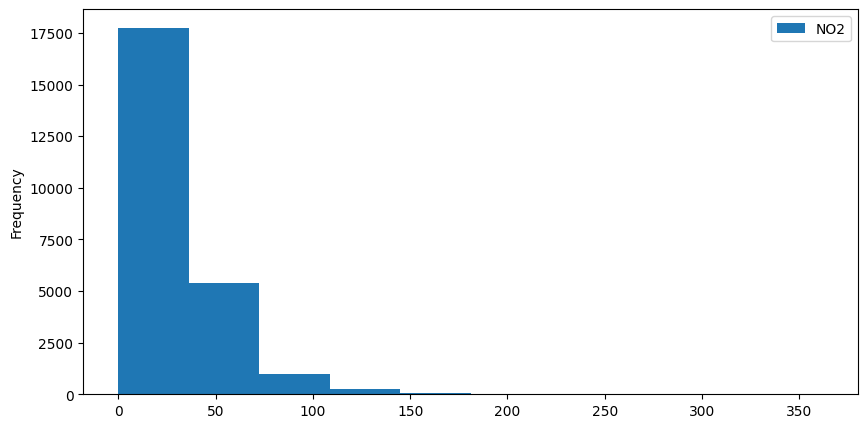

In [27]:
dataframe['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

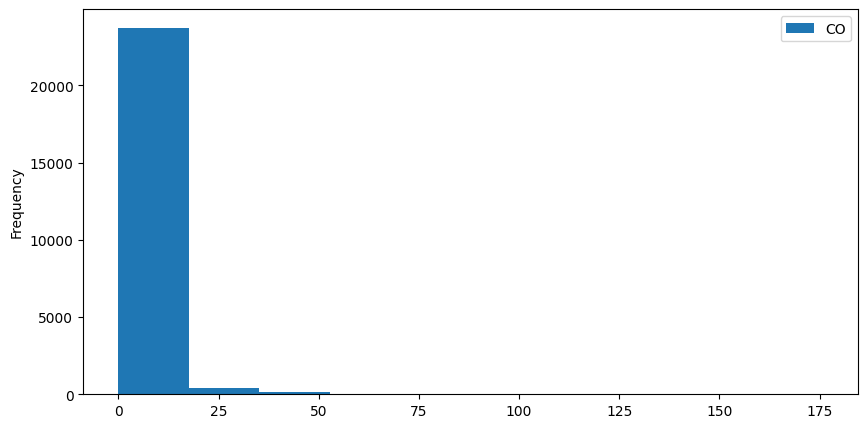

In [28]:
dataframe['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

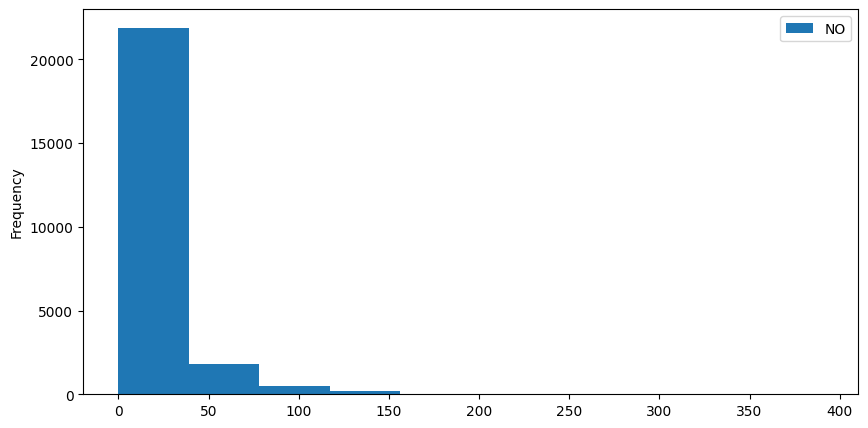

In [29]:
dataframe['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

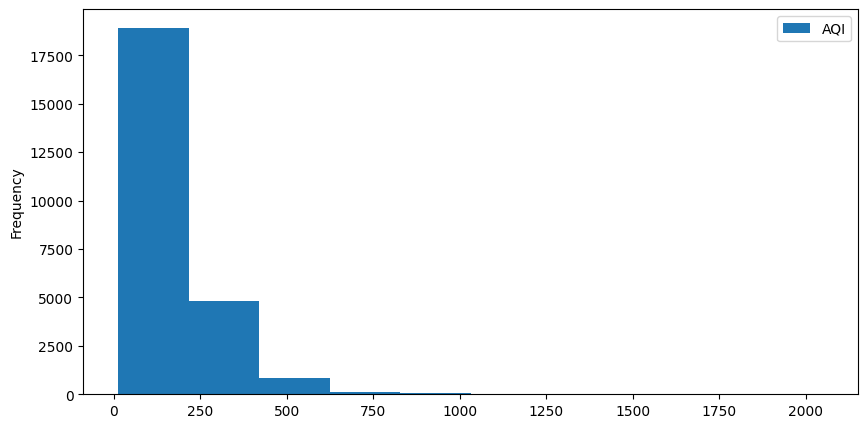

In [30]:
dataframe['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

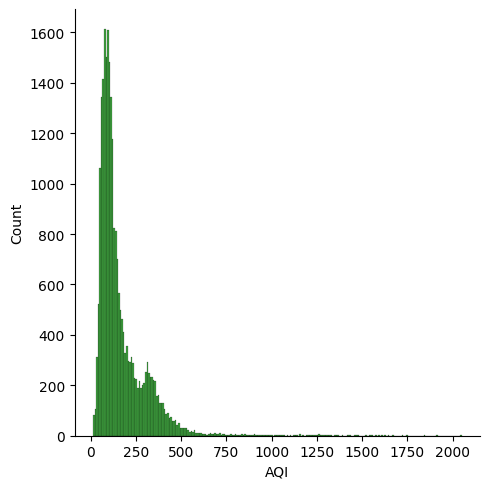

In [31]:
sns.displot(dataframe,x='AQI',color='green')
plt.show()

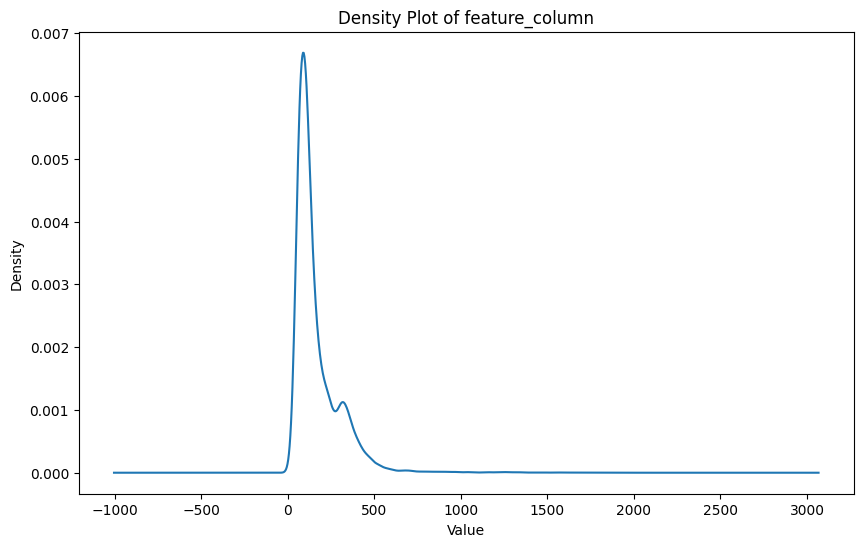

In [32]:
dataframe['AQI'].plot(kind='density', figsize=(10, 6))
plt.title('Density Plot of feature_column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

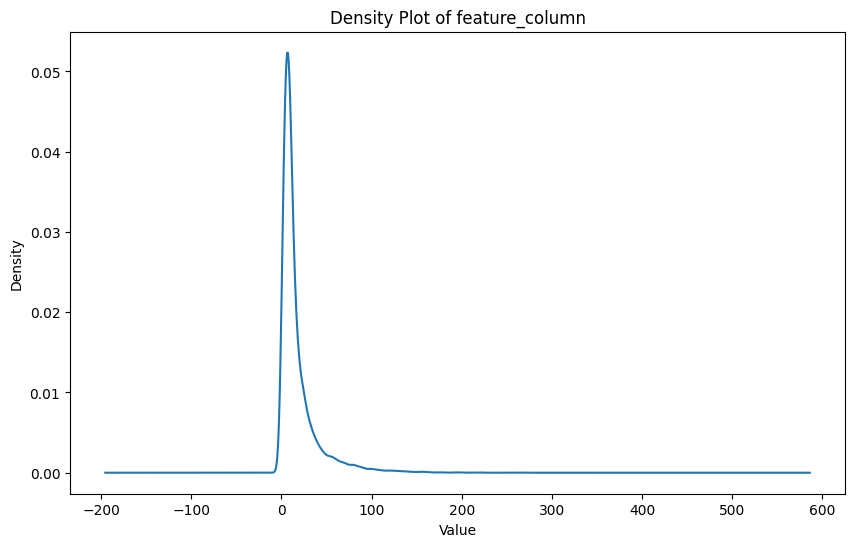

In [33]:
dataframe['NO'].plot(kind='density', figsize=(10, 6))
plt.title('Density Plot of feature_column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

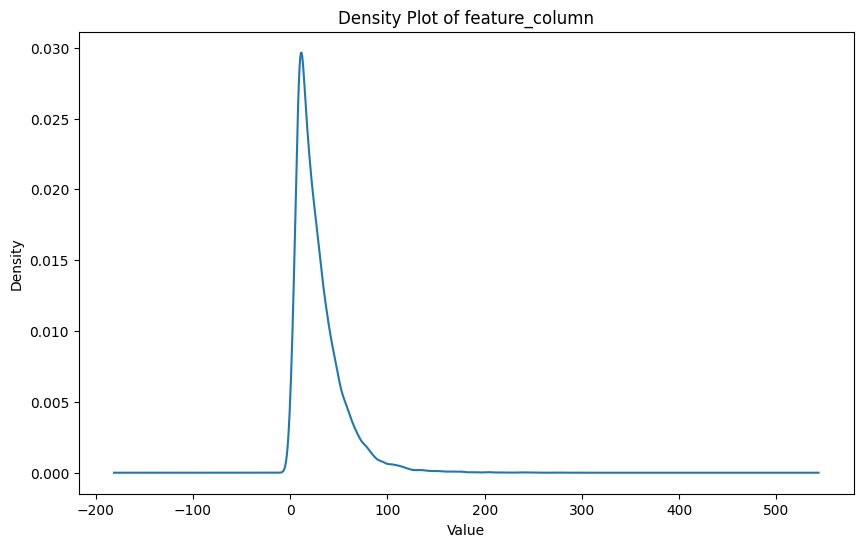

In [34]:
dataframe['NO2'].plot(kind='density', figsize=(10, 6))
plt.title('Density Plot of feature_column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

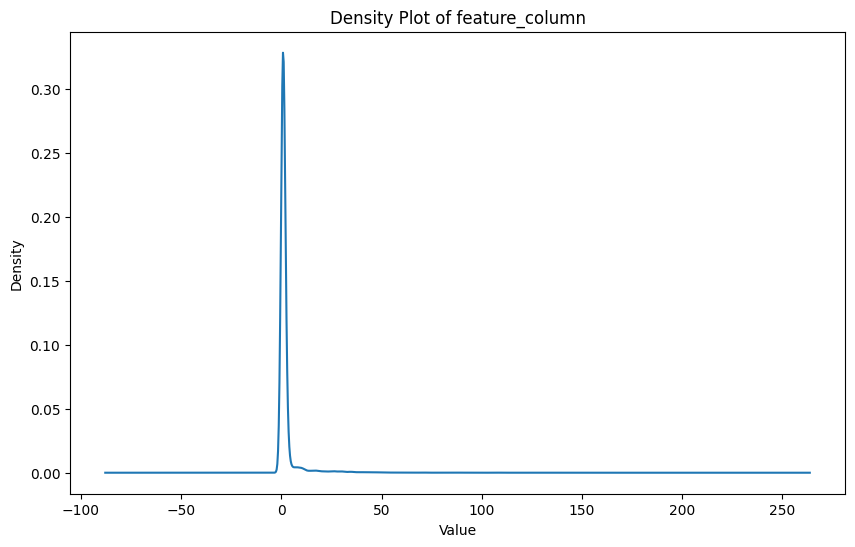

In [35]:
dataframe['CO'].plot(kind='density', figsize=(10, 6))
plt.title('Density Plot of feature_column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

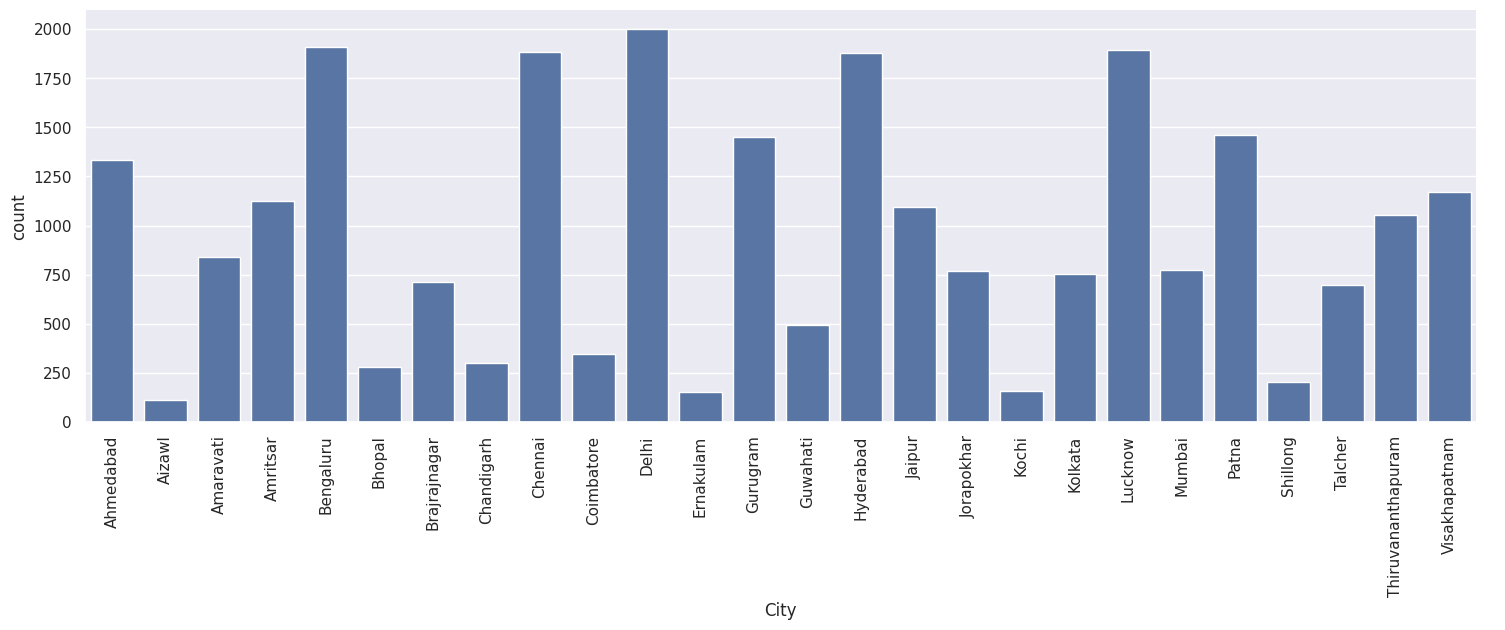

In [36]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=dataframe,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

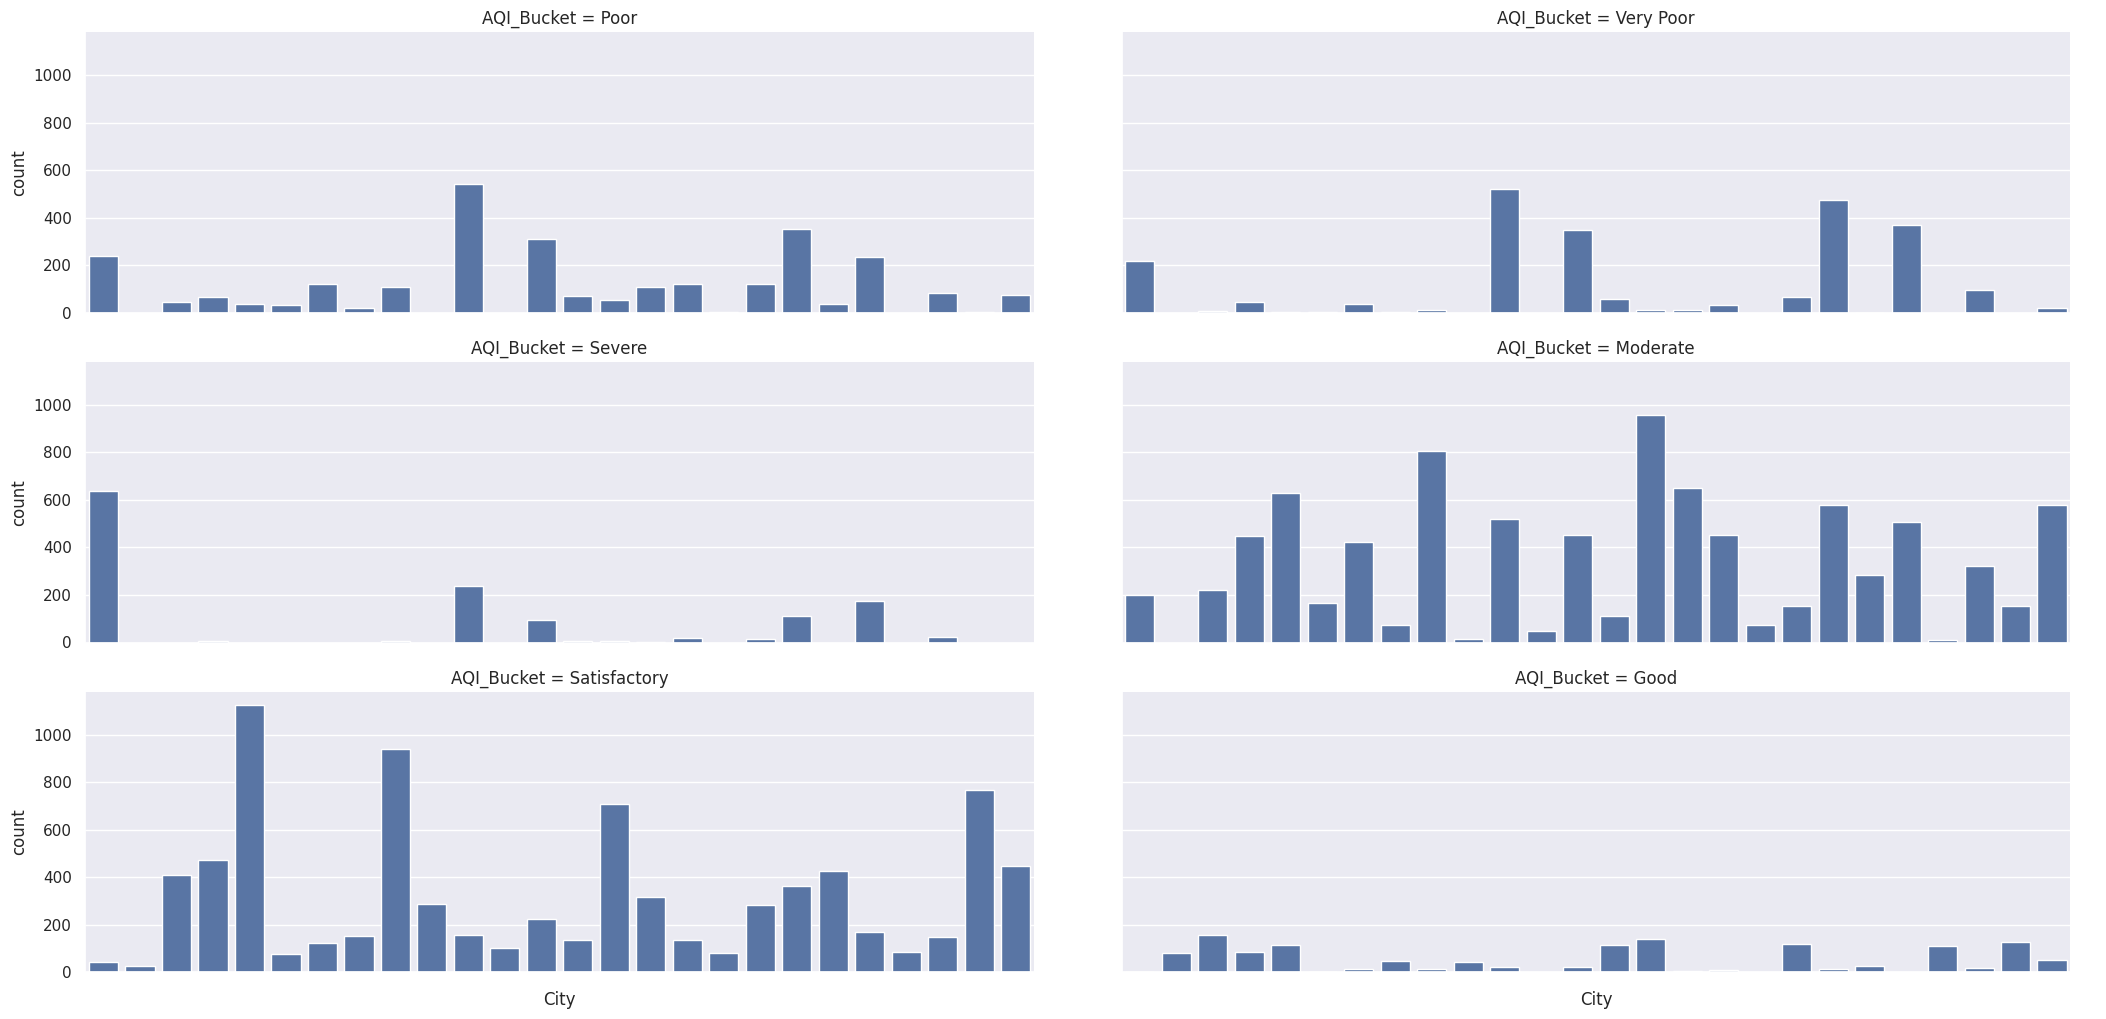

In [37]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=dataframe,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

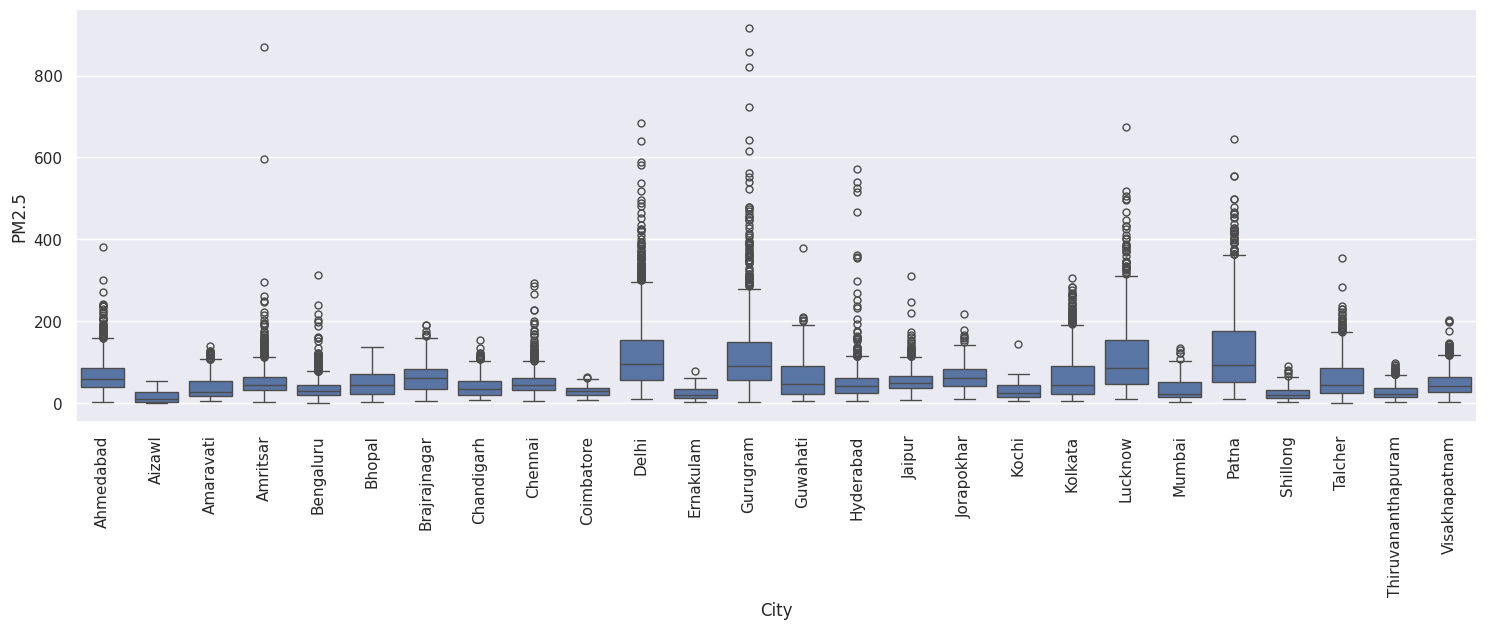

In [38]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=dataframe,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

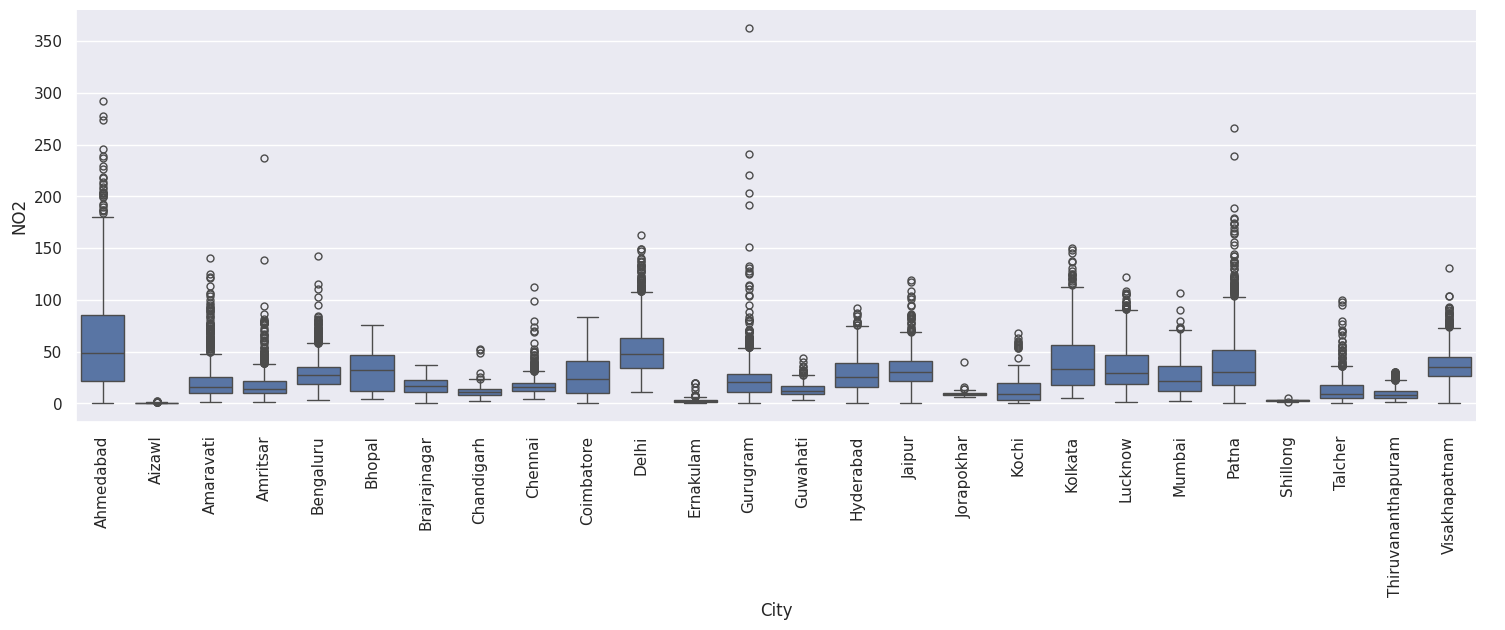

In [39]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=dataframe,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

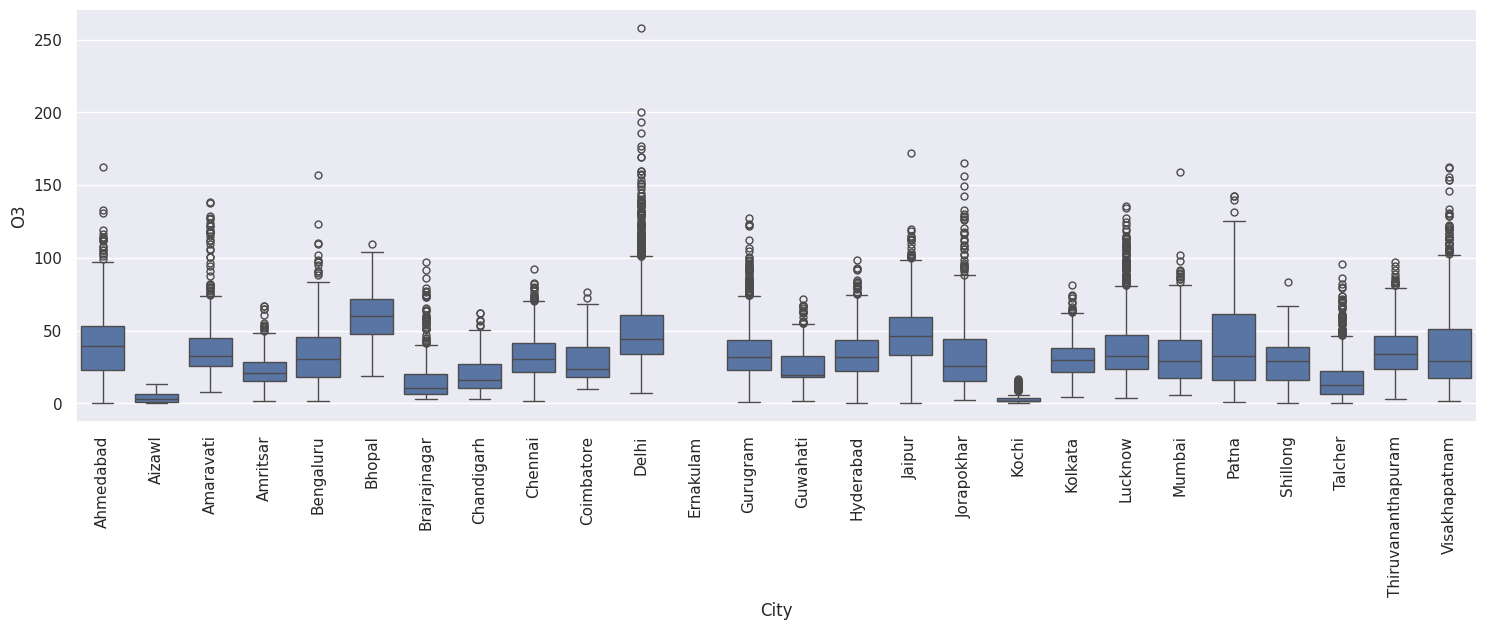

In [40]:
graph3=sns.catplot(x="City",y="O3",data=dataframe,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

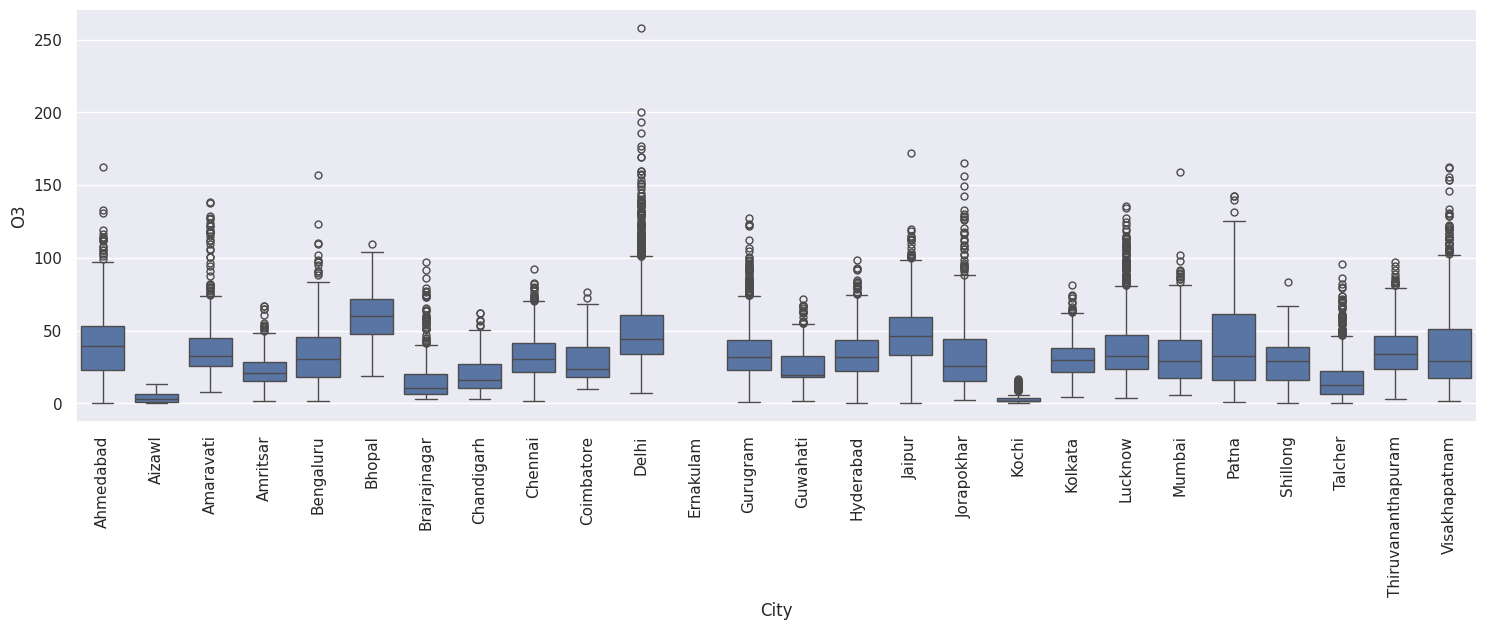

In [41]:
graph3=sns.catplot(x="City",y="O3",data=dataframe,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

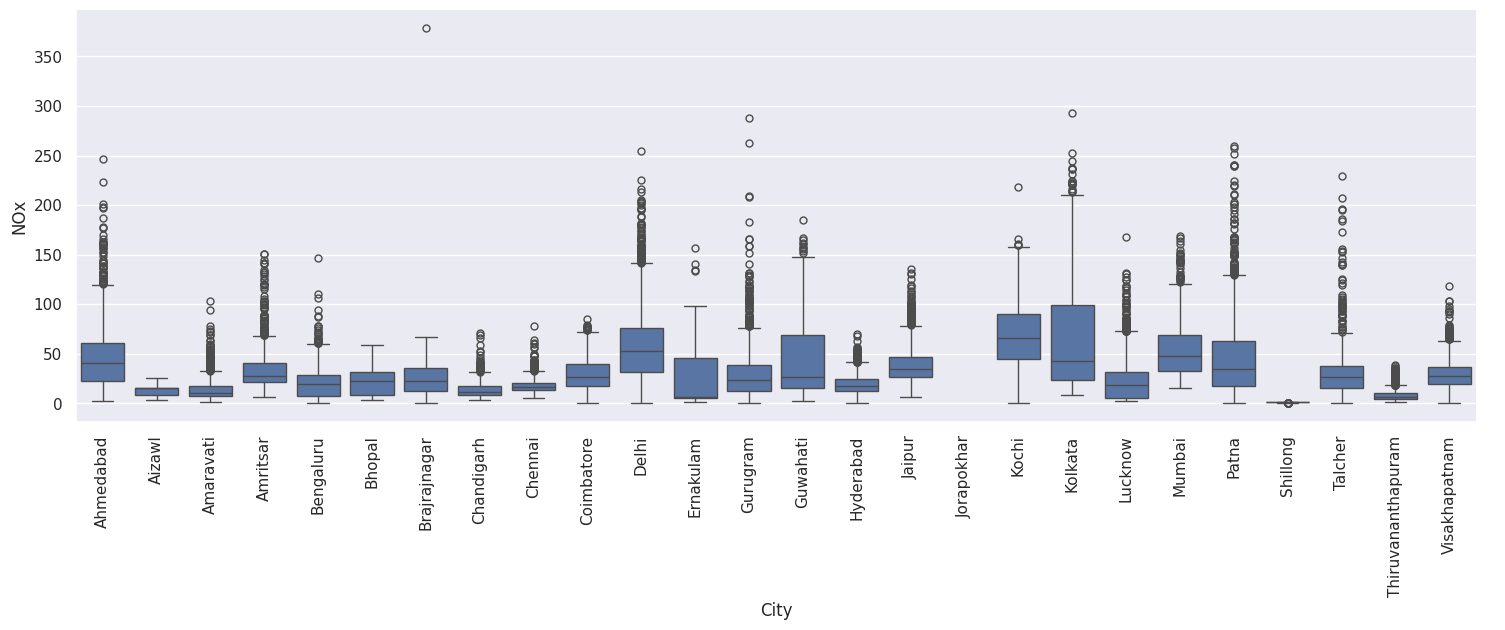

In [42]:
graph3=sns.catplot(x="City",y="NOx",data=dataframe,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

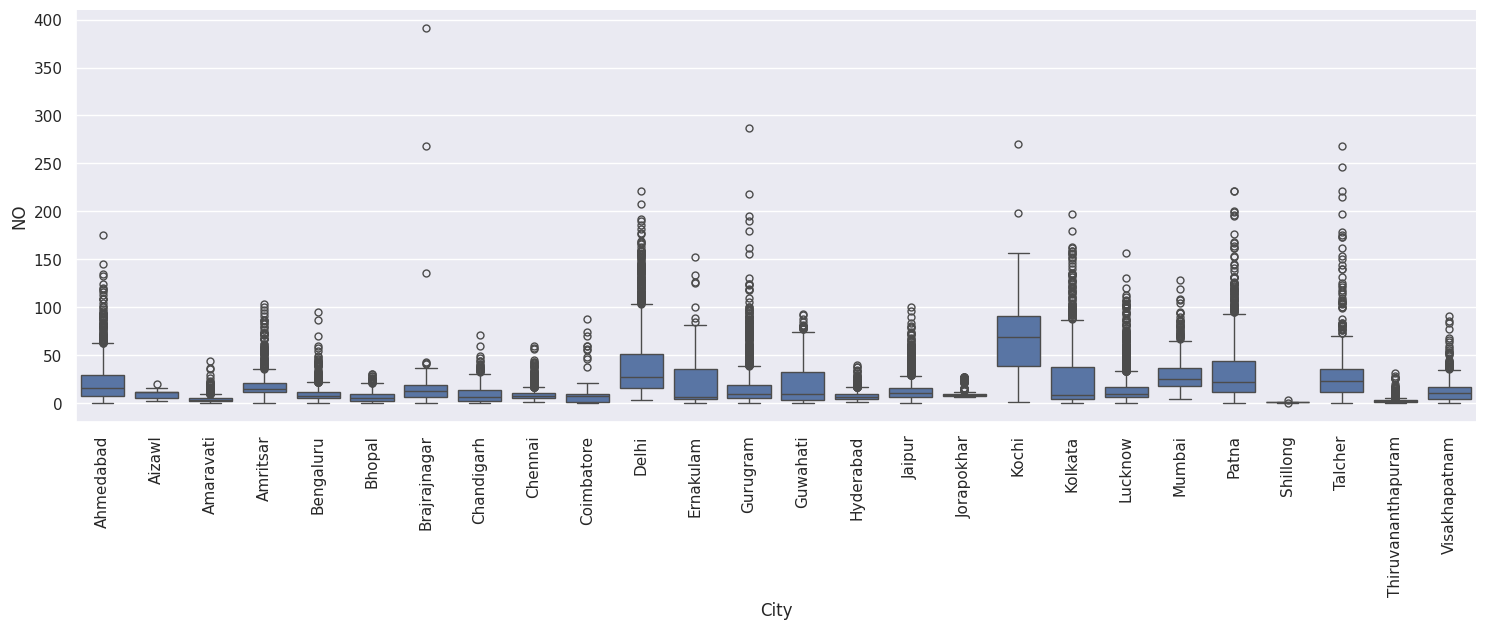

In [43]:
graph3=sns.catplot(x="City",y="NO",data=dataframe,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

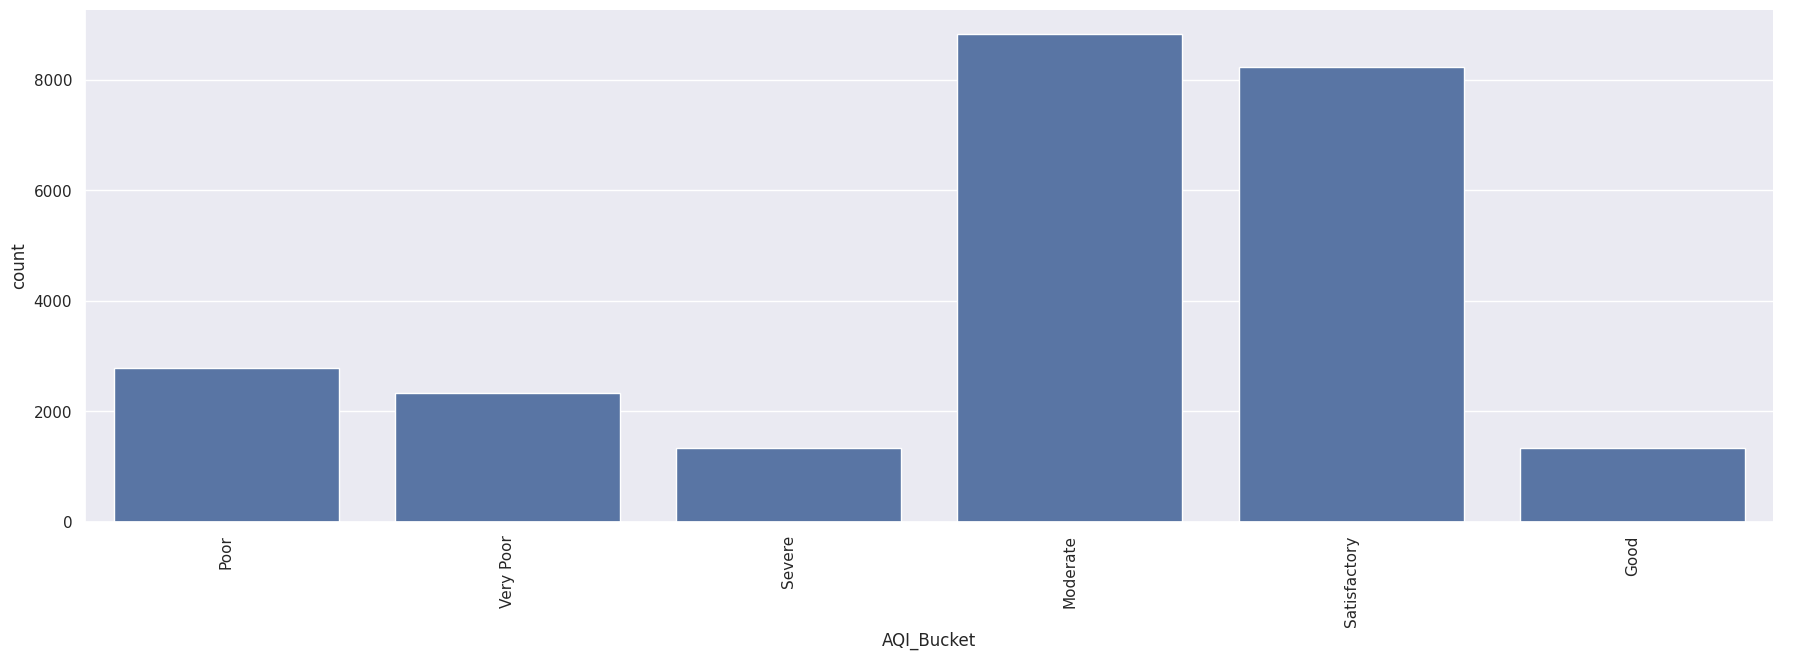

In [44]:
graph7=sns.catplot(x="AQI_Bucket",data=dataframe,kind="count",height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

In [45]:
dataframe.isnull().sum().sort_values(ascending=False)


,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [46]:

dataframe.describe().loc["mean"]


,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [47]:
dataframe = dataframe.replace({

"PM2.5" : {np.nan:67.476613},
"PM10" :{np.nan:118.454435},
"NO": {np.nan:17.622421},
"NO2": {np.nan:28.978391},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"CO":  {np.nan:2.345267},
"SO2": {np.nan:34.912885},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})

In [48]:
dataframe.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


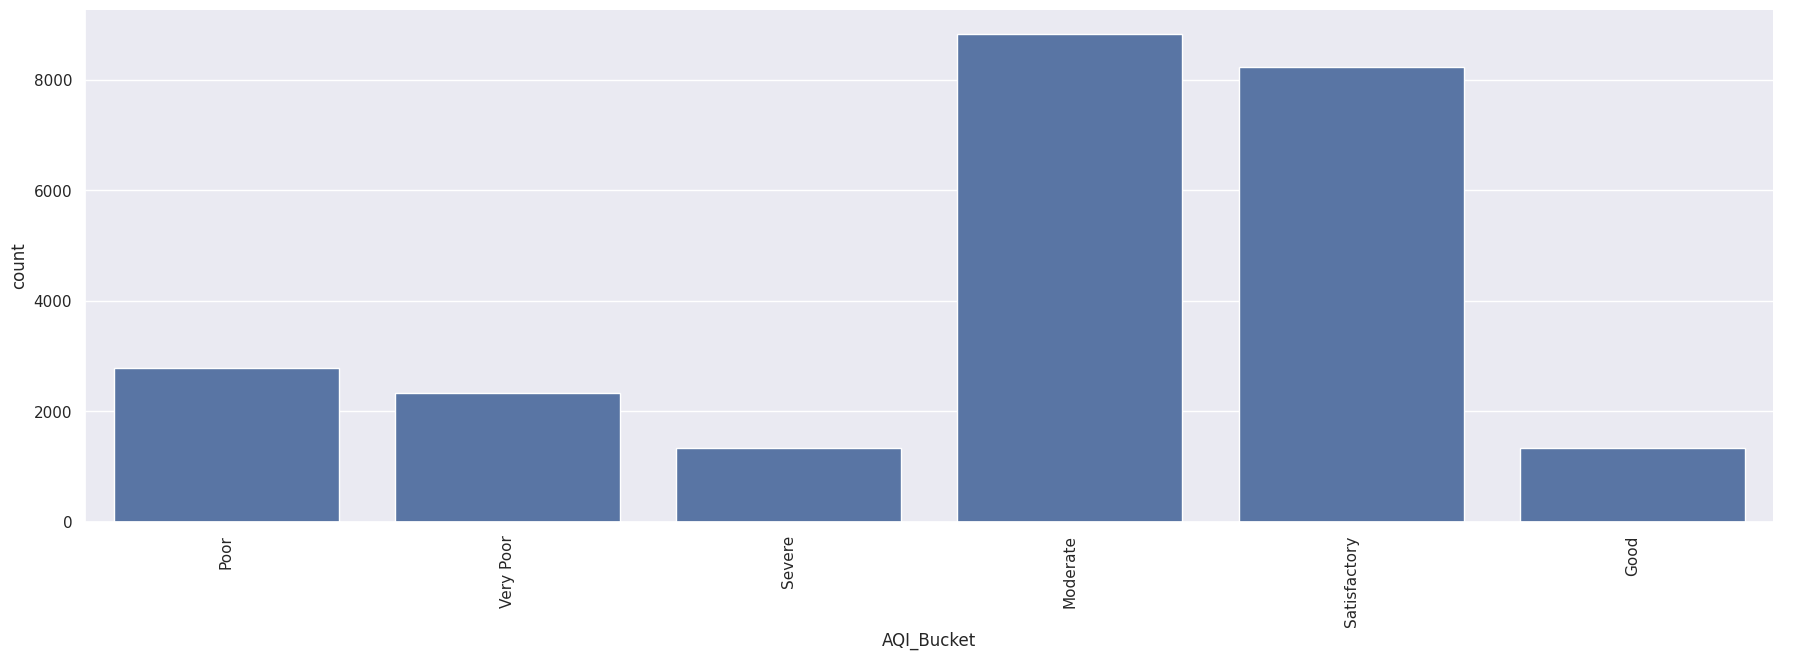

In [49]:
graph=sns.catplot(x="AQI_Bucket",data=dataframe,kind="count",height=6,aspect=3)
graph.set_xticklabels(rotation=90)

In [50]:
dataframe = dataframe.drop(["AQI_Bucket"], axis=1)

In [51]:
dataframe.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

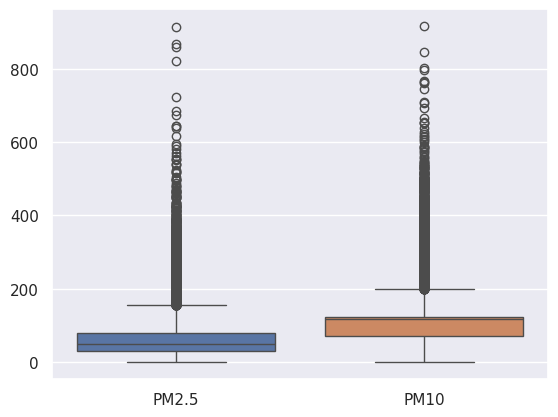

In [52]:
sns.boxplot(data=dataframe[[ 'PM2.5', 'PM10']])

<Axes: >

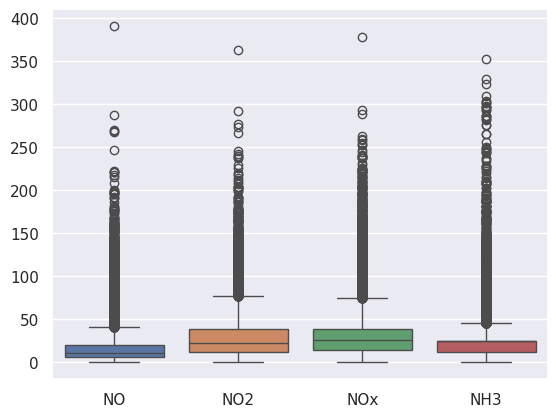

In [53]:
sns.boxplot(data=dataframe[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

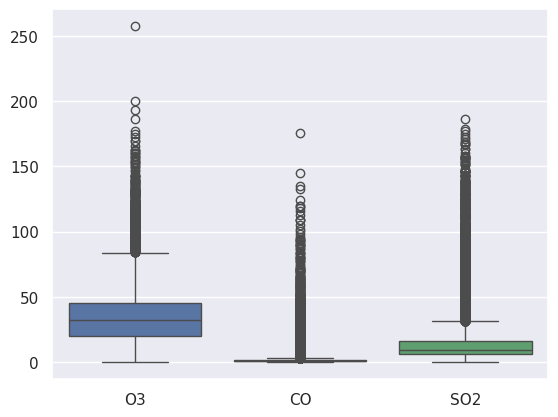

In [54]:
sns.boxplot(data=dataframe[[ 'O3', 'CO', 'SO2']])

<Axes: >

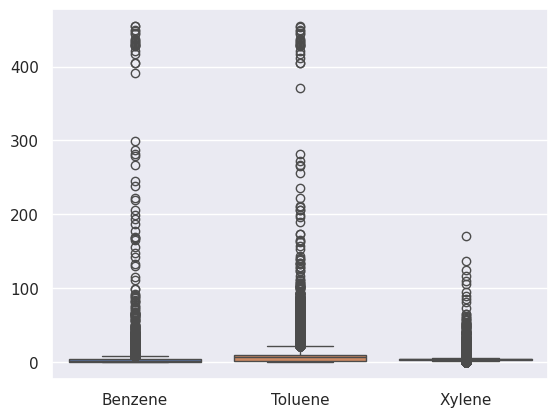

In [55]:
sns.boxplot(data=dataframe[[ 'Benzene', 'Toluene', 'Xylene']])

In [56]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame.
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(dataframe):

    for column in dataframe.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dataframe[column] = dataframe[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return dataframe

dataframe = replace_outliers_with_quartiles(dataframe)

In [57]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.616411,6.091530,0.01,5.79,9.430000,15.940000,31.16
O3,24850.0,33.288444,17.509123,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

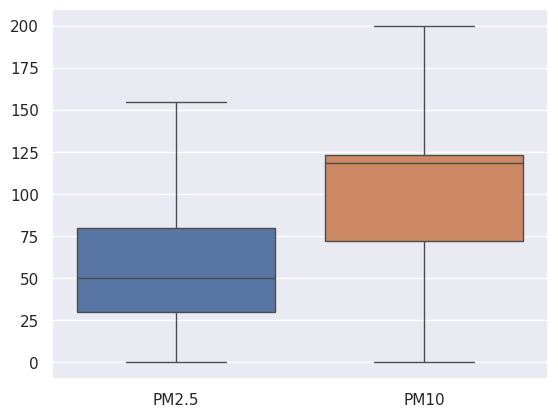

In [58]:
sns.boxplot(data=dataframe[[ 'PM2.5', 'PM10']])



<Axes: >

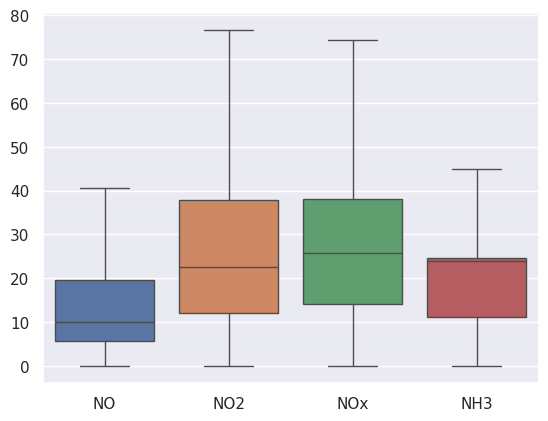

In [59]:
sns.boxplot(data=dataframe[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

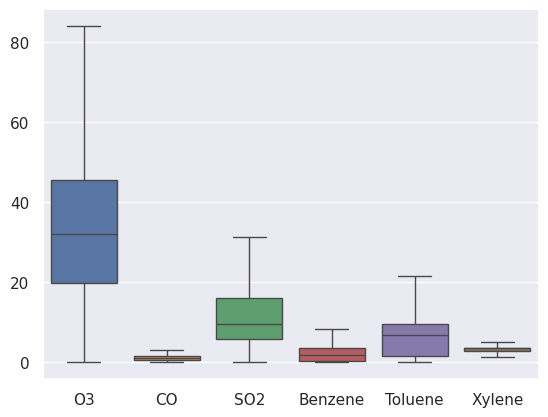

In [60]:
sns.boxplot(data=dataframe[[ 'O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']])

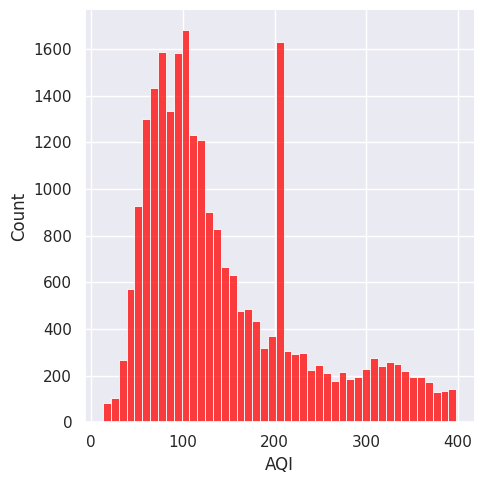

In [61]:
sns.displot(dataframe, x="AQI", color="red")
plt.show()

In [62]:
dataframe1=dataframe.drop(columns=['City','Date'])

In [63]:
dataframe1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [64]:
correlation_matrix = dataframe1.corr()
correlation_matrix

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.623424,0.339863,0.391683,0.379606,0.300151,0.316374,0.243747,0.211603,0.153136,0.149201,0.029313,0.763255
PM10,0.623424,1.000000,0.325088,0.384984,0.346613,0.340739,0.245497,0.240057,0.208756,0.140043,0.134399,0.031047,0.553369
NO,0.339863,0.325088,1.000000,0.435698,0.662857,0.244737,0.289184,0.313893,-0.045278,0.185578,0.179097,0.020165,0.384852
NO2,0.391683,0.384984,0.435698,1.000000,0.540363,0.367119,0.191182,0.228149,0.283147,0.220273,0.179215,-0.056793,0.408239
NOx,0.379606,0.346613,0.662857,0.540363,1.000000,0.212236,0.258869,0.279832,0.027854,0.211900,0.221515,0.007459,0.399600
NH3,0.300151,0.340739,0.244737,0.367119,0.212236,1.000000,0.171027,0.073209,0.163612,-0.027547,-0.037359,0.007073,0.325710
CO,0.316374,0.245497,0.289184,0.191182,0.258869,0.171027,1.000000,0.201572,0.050554,0.128523,0.179194,0.074448,0.437319
SO2,0.243747,0.240057,0.313893,0.228149,0.279832,0.073209,0.201572,1.000000,0.155249,0.162180,0.248388,-0.024971,0.287409
O3,0.211603,0.208756,-0.045278,0.283147,0.027854,0.163612,0.050554,0.155249,1.000000,0.083757,0.104736,-0.014572,0.191052
Benzene,0.153136,0.140043,0.185578,0.220273,0.211900,-0.027547,0.128523,0.162180,0.083757,1.000000,0.533385,0.009649,0.168620


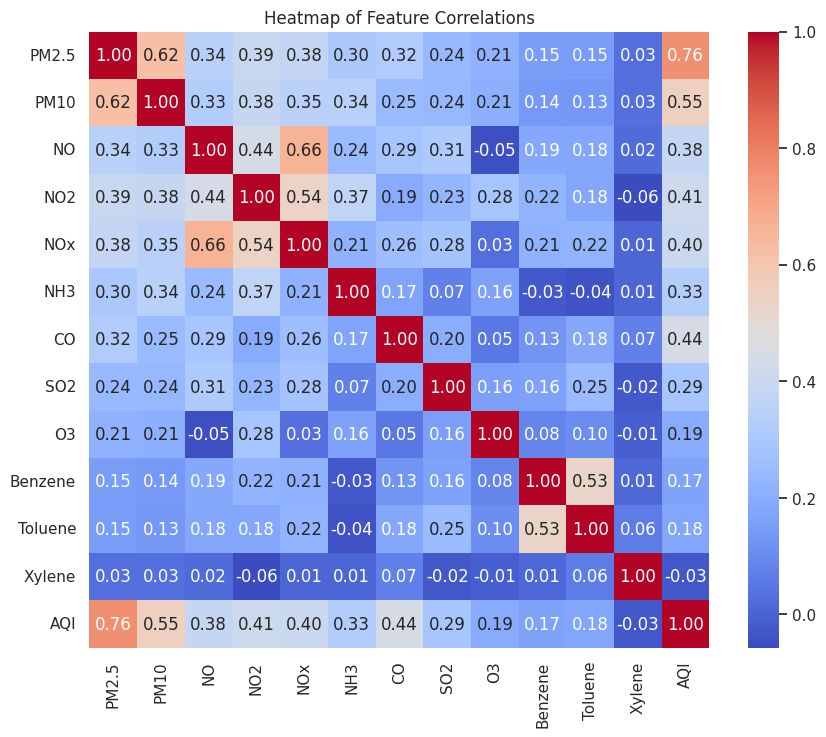

In [65]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [67]:
dataframe1


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [68]:
df1 = StandardScaler().fit_transform(dataframe1)

In [69]:
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]])

In [70]:
dataframe1 = pd.DataFrame(df1,columns = dataframe1.columns)

In [71]:
dataframe1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733,0.698559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.339234,-0.570482,0.077392,1.245171,-1.171699,-1.211760
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.345337,-0.179821,-0.743133,-0.854500,-1.171699,-0.880028
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.360575,-0.132987,-1.142455,-1.322987,-1.171699,-0.902906
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.127460,-0.284911,-1.147926,-1.325116,-1.171699,-1.063053


**Training and splitting data**

In [73]:
x=dataframe1[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=dataframe1["AQI"]

In [74]:
x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733
...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.339234,-0.570482,0.077392,1.245171,-1.171699
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.345337,-0.179821,-0.743133,-0.854500,-1.171699
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.360575,-0.132987,-1.142455,-1.322987,-1.171699
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.127460,-0.284911,-1.147926,-1.325116,-1.171699


In [75]:
y

,AQI
0,0.709998
1,2.071243
2,0.698559
3,0.698559
4,0.698559
...,...
24845,-1.211760
24846,-0.880028
24847,-0.902906
24848,-1.063053


In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


**LINEAR REGRESSION**

In [77]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [79]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [80]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.5912349545683131
RMSE TestData =  0.5831772714954147
--------------------------------------------------
RSquared value on train: 0.6513543609598098
RSquared value on test: 0.6562667641934443


**K-Nearest Neighbour**

In [81]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [83]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [84]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.5912349545683131
RMSE TestData =  0.5831772714954147
--------------------------------------------------
RSquared value on train: 0.6513543609598098
RSquared value on test: 0.6562667641934443


**Decision Tree**

In [85]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [86]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [88]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.029944869973786627
RMSE TestData =  0.5326034164594264
--------------------------------------------------
RSquared value on train: 0.9991056471481347
RSquared value on test: 0.7132996368459334


**Random Forest Regressor**

In [89]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [90]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [91]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.14983758901551605
RMSE TestData =  0.3823527159740347
--------------------------------------------------
RSquared value on train: 0.9776073451779286
RSquared value on test: 0.8522427818132519


random forest regressor which is an ensemble method has highest accuarcy than any other prediciton models